# Machine Learning

# Transformation

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Generate a right-skewed dataset using exponential distribution
data = np.random.exponential(scale=2, size=100)

# Create a DataFrame
df = pd.DataFrame({'Sales': data})

# Display first 5 rows
print(df.head())

      Sales
0  4.205768
1  0.614127
2  1.819983
3  3.241182
4  3.900091


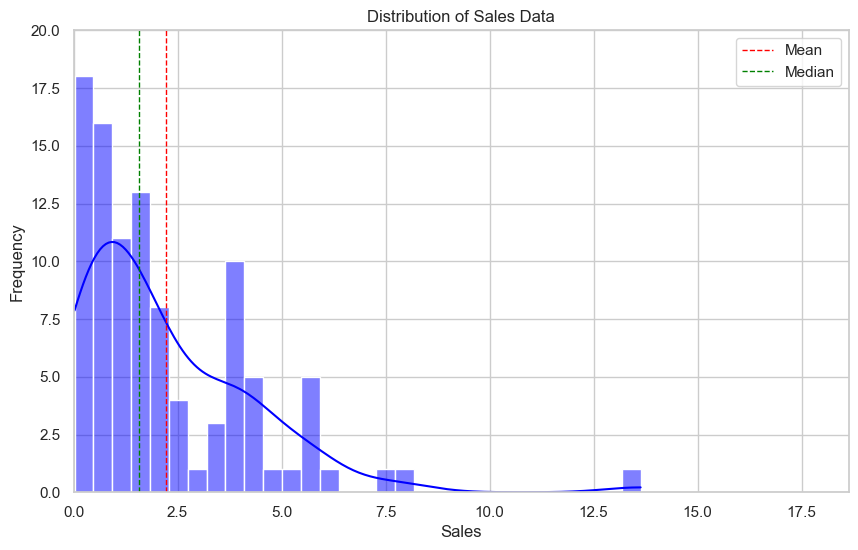

In [7]:
# Let's visualize the distribution of the data
sns.set(style="whitegrid")
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sales Data')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.xlim(0, df['Sales'].max() + 5)
plt.ylim(0, 20)
plt.axvline(df['Sales'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['Sales'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()


# Box-Cox and Yeo-Johnson Transformation

In [9]:
from sklearn.preprocessing import PowerTransformer
# Apply Power Transformation to make the data more Gaussian-like
Box_Cox = PowerTransformer(method='box-cox')
Yeo_Johnson = PowerTransformer(method='yeo-johnson')
# Fit and transform the data using Box-Cox
df['Box_Cox_Transformed'] = Box_Cox.fit_transform(df[['Sales']])
# Fit and transform the data using Yeo-Johnson
df['Yeo_Johnson_Transformed'] = Yeo_Johnson.fit_transform(df[['Sales']])
# Display the first 5 rows of the transformed data
print(df.head())

      Sales  Box_Cox_Transformed  Yeo_Johnson_Transformed
0  4.205768             1.060401                 1.120395
1  0.614127            -0.738997                -0.842682
2  1.819983             0.167477                 0.171303
3  3.241182             0.761910                 0.820709
4  3.900091             0.971888                 1.033644


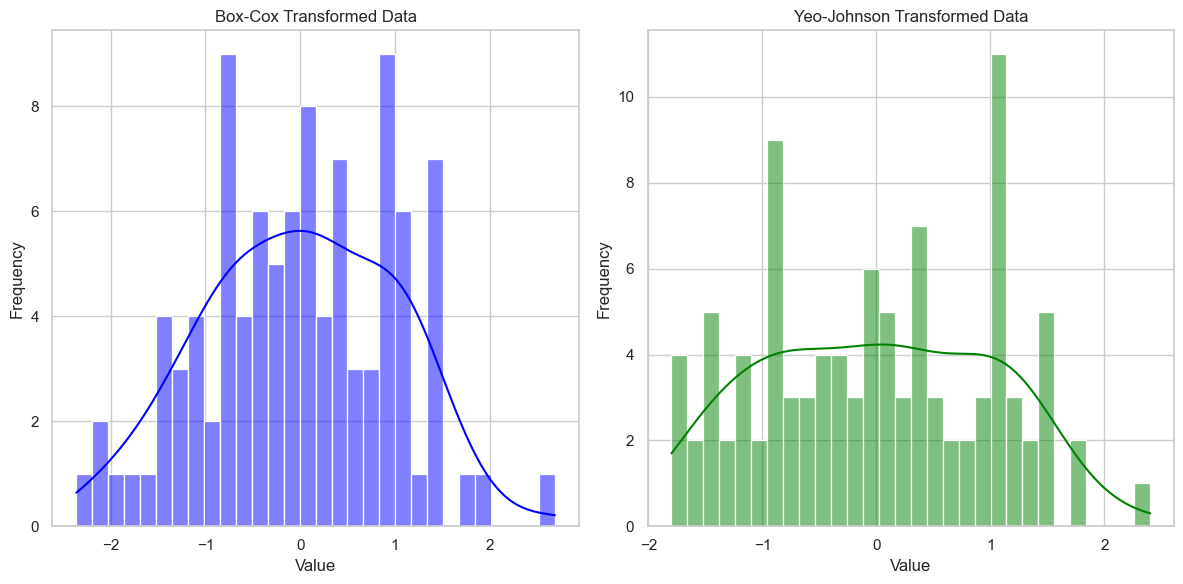

In [10]:
# Let's visualize the distribution of the data Box-Cox transformed and Yeo-Johnson transformed
plt.figure(figsize=(12, 6))

# Create a histogram for Box-Cox transformed data
plt.subplot(1, 2, 1)
sns.histplot(df['Box_Cox_Transformed'], bins=30, kde=True, color='blue')
plt.title('Box-Cox Transformed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Create a histogram for Yeo-Johnson transformed data
plt.subplot(1, 2, 2)
sns.histplot(df['Yeo_Johnson_Transformed'], bins=30, kde=True, color='green')
plt.title('Yeo-Johnson Transformed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Quantile Transformation

      Sales  Box_Cox_Transformed  Yeo_Johnson_Transformed  \
0  4.205768             1.060401                 1.120395   
1  0.614127            -0.738997                -0.842682   
2  1.819983             0.167477                 0.171303   
3  3.241182             0.761910                 0.820709   
4  3.900091             0.971888                 1.033644   

   Quantile_Transformed  
0              1.073988  
1             -0.666564  
2              0.191052  
3              0.574460  
4              0.908458  


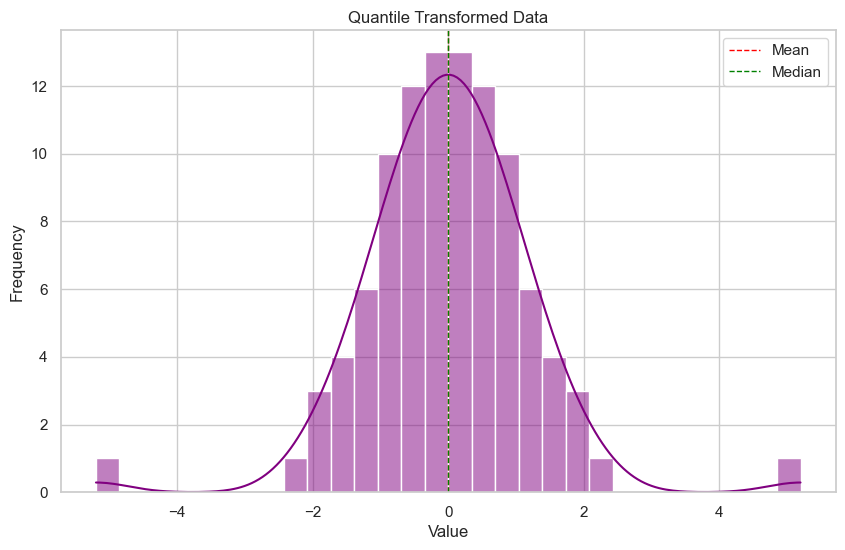

In [ ]:
from sklearn.preprocessing import QuantileTransformer
# Apply Quantile Transformation to make the data more Gaussian-like
quantile_transformer = QuantileTransformer(output_distribution='normal', n_quantiles=min(100, len(df)))
# Fit and transform the data using Quantile Transformation
df['Quantile_Transformed'] = quantile_transformer.fit_transform(df[['Sales']])
# Display the first 5 rows of the transformed data
print(df.head())
# Let's visualize the distribution of the data after Quantile Transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantile_Transformed'], bins=30, kde=True, color='purple')
plt.title('Quantile Transformed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.axvline(df['Quantile_Transformed'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['Quantile_Transformed'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()

# Log Transformation

   Revenue  Profit
0      100      10
1      250      30
2      500      60
3     1000     120
4     2000     250
5     4000     500
6     8000    1000
7    16000    2000


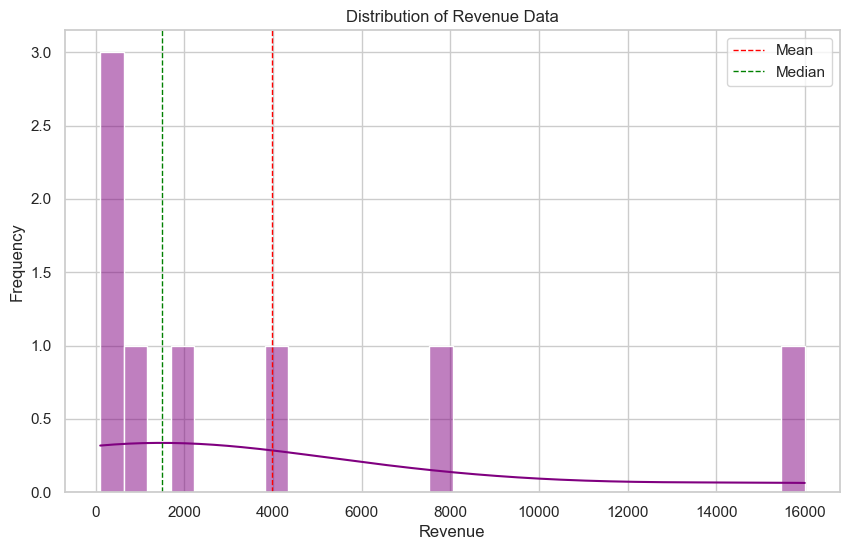

   Revenue  Profit  Log_Revenue  Log_Profit
0      100      10     4.605170    2.302585
1      250      30     5.521461    3.401197
2      500      60     6.214608    4.094345
3     1000     120     6.907755    4.787492
4     2000     250     7.600902    5.521461


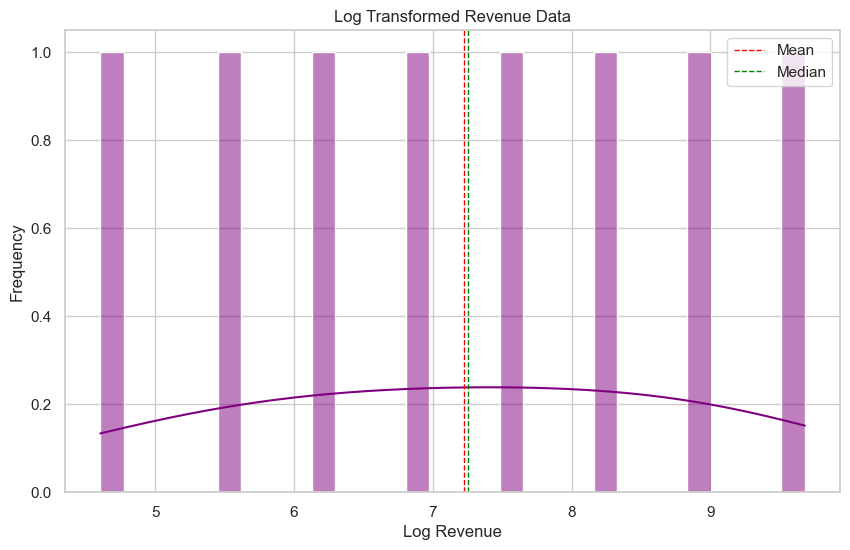

In [22]:
# Example dataset for log transformation

data = {
    'Revenue': [100, 250, 500, 1000, 2000, 4000, 8000, 16000],
    'Profit': [10, 30, 60, 120, 250, 500, 1000, 2000]
}

df = pd.DataFrame(data)
print(df)
# Let's visualize the distribution of the data before Log Transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue'], bins=30, kde=True, color='purple')
plt.title('Distribution of Revenue Data')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.axvline(df['Revenue'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['Revenue'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()

# Apply Log Transformation
df['Log_Revenue'] = np.log(df['Revenue'])
df['Log_Profit'] = np.log(df['Profit'])
# Display the first 5 rows of the transformed data
print(df.head())
# Let's visualize the distribution of the data after Log Transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Revenue'], bins=30, kde=True, color='purple')
plt.title('Log Transformed Revenue Data')
plt.xlabel('Log Revenue')
plt.ylabel('Frequency')
plt.axvline(df['Log_Revenue'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['Log_Revenue'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()


# Normalization

## L1 Normalization

In [15]:
from sklearn.preprocessing import Normalizer

data = {
    'Feature_1': [10, 20, 30],
    'Feature_2': [5, 10, 15],
    'Feature_3': [2, 4, 6]
}

df = pd.DataFrame(data)
print(df)
# Apply Normalization to the original data
normalizer = Normalizer(norm="l1")
# Fit and transform the data using Normalization
df['Normalized'] = normalizer.fit_transform(df[['Feature_1', 'Feature_2', 'Feature_3']]).tolist()
# Display the first 5 rows of the normalized data
print(df.head())


   Feature_1  Feature_2  Feature_3
0         10          5          2
1         20         10          4
2         30         15          6
   Feature_1  Feature_2  Feature_3  \
0         10          5          2   
1         20         10          4   
2         30         15          6   

                                          Normalized  
0  [0.5882352941176471, 0.29411764705882354, 0.11...  
1  [0.5882352941176471, 0.29411764705882354, 0.11...  
2  [0.5882352941176471, 0.29411764705882354, 0.11...  


## L2 Normalization


In [17]:

data = {
    'Feature_1': [10, 20, 30, 40, 50],
    'Feature_2': [5, 10, 15, 20, 25],
    'Feature_3': [2, 4, 6, 8, 10]
}

df = pd.DataFrame(data)
print(df)
# Apply L2 Normalization to the original data
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm="l2")
# Fit and transform the data using L2 Normalization
df['L2_Normalized'] = normalizer.fit_transform(df[['Feature_1', 'Feature_2', 'Feature_3']]).tolist()
# Display the first 5 rows of the L2 normalized data
print(df.head())

   Feature_1  Feature_2  Feature_3
0         10          5          2
1         20         10          4
2         30         15          6
3         40         20          8
4         50         25         10
   Feature_1  Feature_2  Feature_3  \
0         10          5          2   
1         20         10          4   
2         30         15          6   
3         40         20          8   
4         50         25         10   

                                       L2_Normalized  
0  [0.8804509063256238, 0.4402254531628119, 0.176...  
1  [0.8804509063256238, 0.4402254531628119, 0.176...  
2  [0.8804509063256238, 0.4402254531628119, 0.176...  
3  [0.8804509063256238, 0.4402254531628119, 0.176...  
4  [0.8804509063256238, 0.4402254531628119, 0.176...  
